In [1]:
!pip install tensorflow streamlit matplot

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
data_train_path = r"E:\Downloads\Mask Detection data\data\train"
data_test_path = r"E:\Downloads\Mask Detection data\data\test"
data_val_path = r"E:\Downloads\Mask Detection data\data\val"

In [4]:
img_width = 180
img_height = 180

In [5]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [6]:
train_generator = train_datagen.flow_from_directory(
    data_train_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary')

Found 5960 images belonging to 2 classes.


In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=None
)

Found 746 files belonging to 2 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=None
)

Found 744 files belonging to 2 classes.


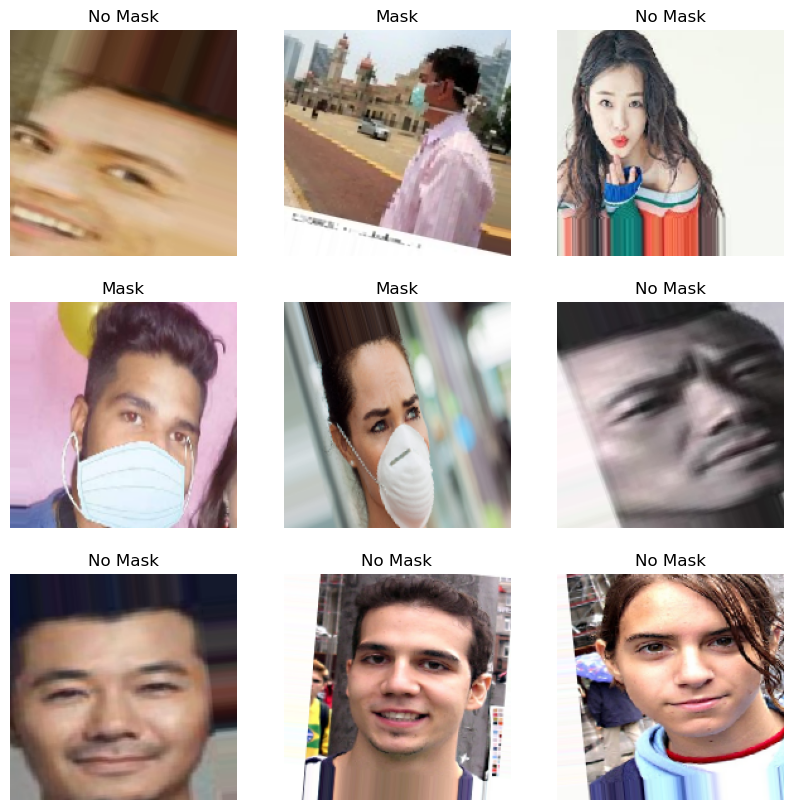

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.title("Mask" if labels[i] == 0 else "No Mask")
        plt.axis("off")
    break  # Display only the first batch of images
plt.show()

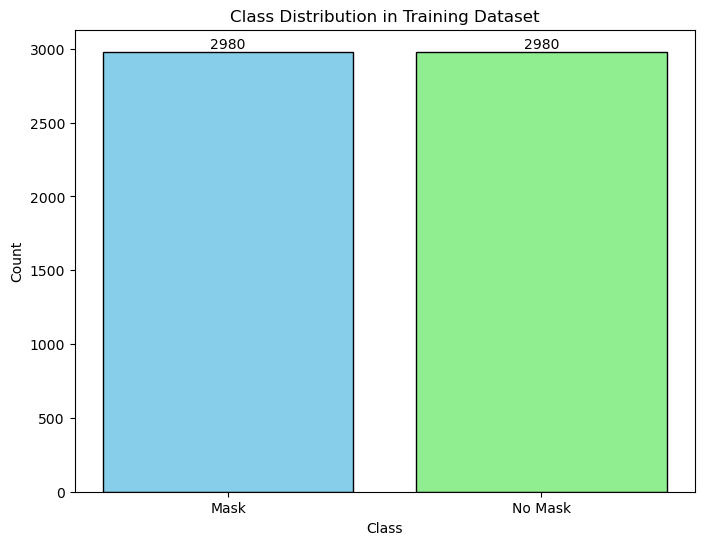

In [10]:
import numpy as np

# Get class labels and their counts
unique_labels, class_counts = np.unique(train_generator.labels, return_counts=True)

# Define colors for each class
colors = ['skyblue', 'lightgreen']  # Color for 'No Mask' and 'Mask' classes respectively

# Plot class distribution with annotations
plt.figure(figsize=(8, 6))
bars = plt.bar(unique_labels, class_counts, color=colors, edgecolor='black')

# Add annotations to the bars
for bar, count in zip(bars, class_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom')

plt.title('Class Distribution in Training Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([1, 0], ['No Mask', 'Mask'])
plt.show()


In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.5),  # Adding dropout
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [13]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(train_generator,
                    validation_data=data_val,
                    epochs=25,
                    callbacks=[early_stopping])

Epoch 1/25


125/187 [===================>..........] - ETA: 17s - loss: 0.5368 - accuracy: 0.7261

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


187/187 [==============================] - 57s 301ms/step - loss: 0.4993 - accuracy: 0.7550 - val_loss: 0.3896 - val_accuracy: 0.8418
Epoch 2/25
187/187 [==============================] - 54s 287ms/step - loss: 0.3953 - accuracy: 0.8248 - val_loss: 0.2457 - val_accuracy: 0.9223
Epoch 3/25
187/187 [==============================] - 55s 295ms/step - loss: 0.3495 - accuracy: 0.8482 - val_loss: 0.2385 - val_accuracy: 0.8981
Epoch 4/25
187/187 [==============================] - 58s 312ms/step - loss: 0.3230 - accuracy: 0.8638 - val_loss: 0.2907 - val_accuracy: 0.8861
Epoch 5/25
187/187 [==============================] - 75s 399ms/step - loss: 0.2867 - accuracy: 0.8872 - val_loss: 0.1835 - val_accuracy: 0.9276
Epoch 6/25
187/187 [==============================] - 88s 469ms/step - loss: 0.2546 - accuracy: 0.8995 - val_loss: 0.1970 - val_accuracy: 0.9276
Epoch 7/25
187/187 [==============================] - 82s 435ms/step - loss: 0.2501 - accuracy: 0.9029 - val_loss: 0.1852 - val_accuracy: 0.9

In [15]:
test_loss, test_accuracy = model.evaluate(data_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

24/24 [==============================] - 1s 47ms/step - loss: 0.1208 - accuracy: 0.9691
Test Loss: 0.12081653624773026
Test Accuracy: 0.9690860509872437


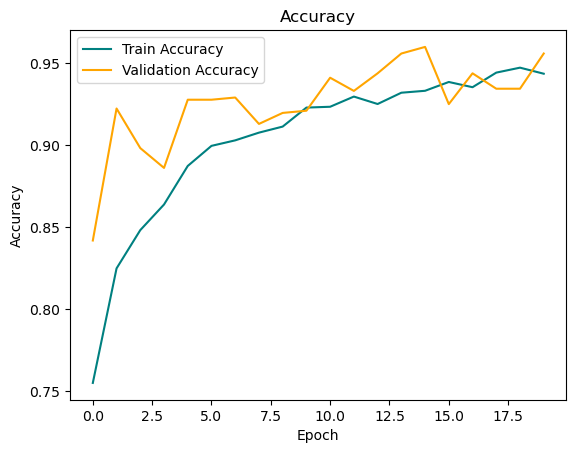

In [16]:
plt.plot(history.history['accuracy'], color='teal', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

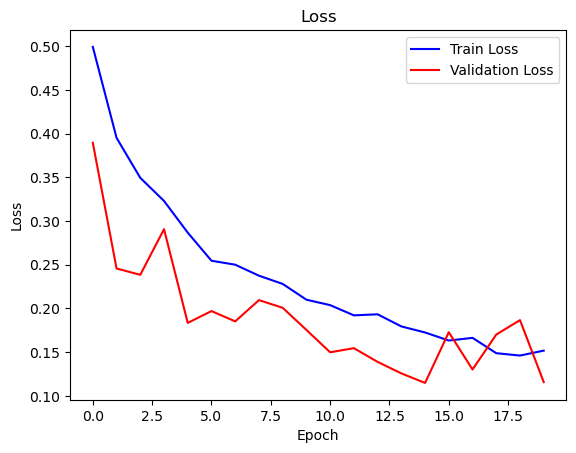

In [17]:
# Plotting loss curves
plt.plot(history.history['loss'], color='blue', label='Train Loss')
plt.plot(history.history['val_loss'], color='red', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

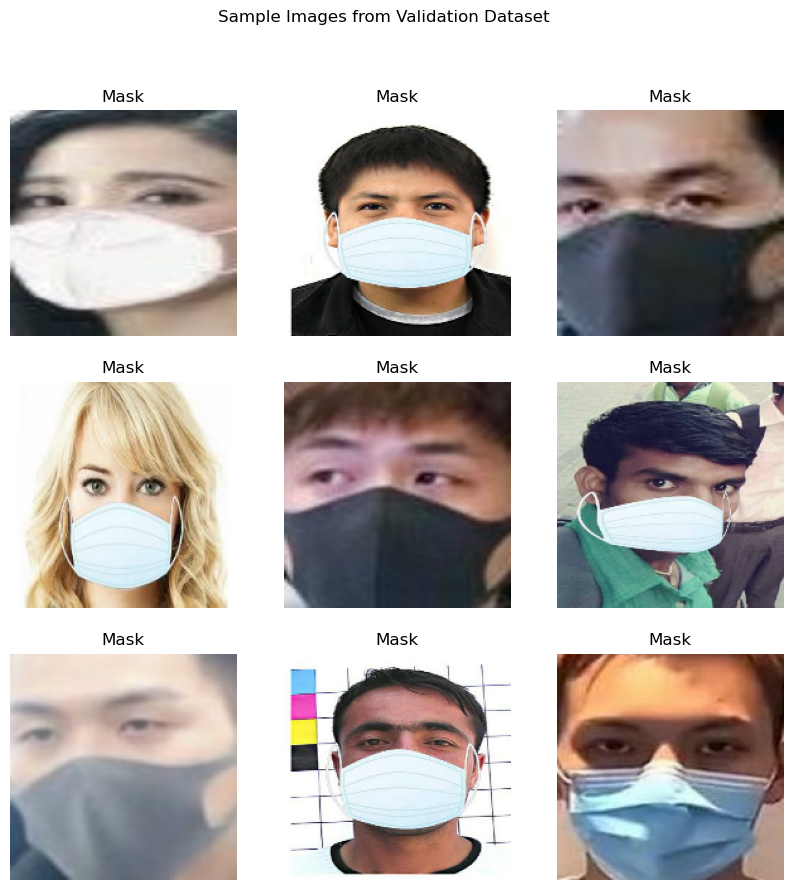

In [18]:
# Visualize sample images from validation dataset
plt.figure(figsize=(10, 10))
for images, labels in data_val.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("Mask" if labels[i] == 0 else "No Mask")
        plt.axis("off")
plt.suptitle('Sample Images from Validation Dataset')
plt.show()



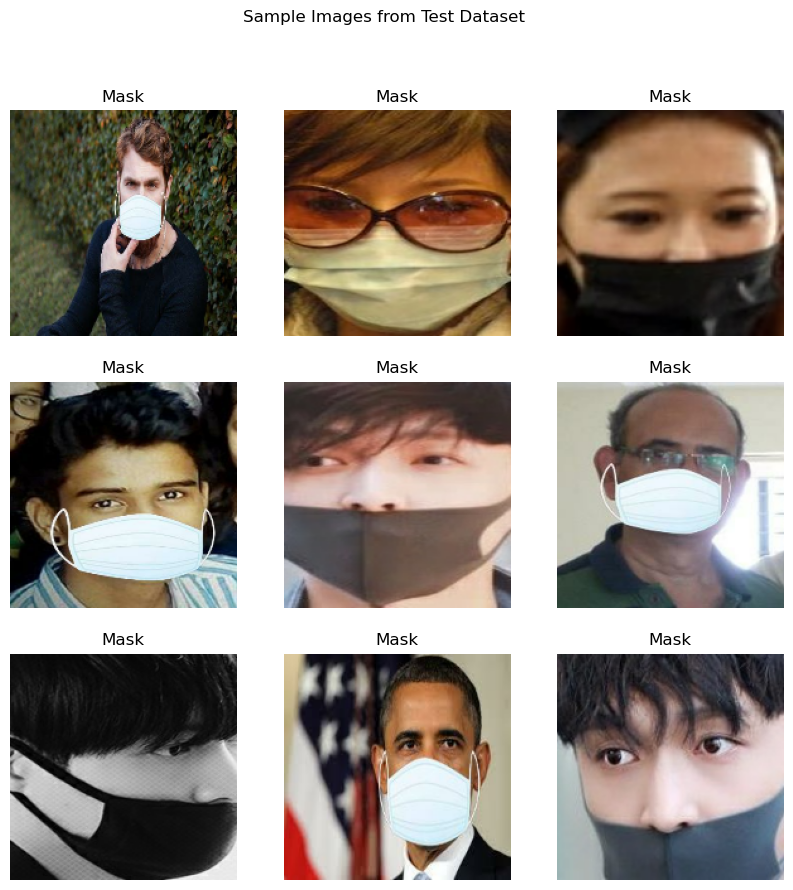

In [19]:
# Visualize sample images from test dataset
plt.figure(figsize=(10, 10))
for images, labels in data_test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("Mask" if labels[i] == 0 else "No Mask")
        plt.axis("off")
plt.suptitle('Sample Images from Test Dataset')
plt.show()


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
predictions = model.predict(data_test)
y_pred = np.where(predictions > 0.5, 1, 0)

24/24 [==============================] - 1s 50ms/step


In [23]:
y_true = np.concatenate([y for _, y in data_test], axis=0)

In [24]:
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Mask', 'No Mask']))

Classification Report:
              precision    recall  f1-score   support

        Mask       0.99      0.95      0.97       372
     No Mask       0.95      0.99      0.97       372

    accuracy                           0.97       744
   macro avg       0.97      0.97      0.97       744
weighted avg       0.97      0.97      0.97       744



In [25]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

Confusion Matrix:
[[353  19]
 [  4 368]]


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

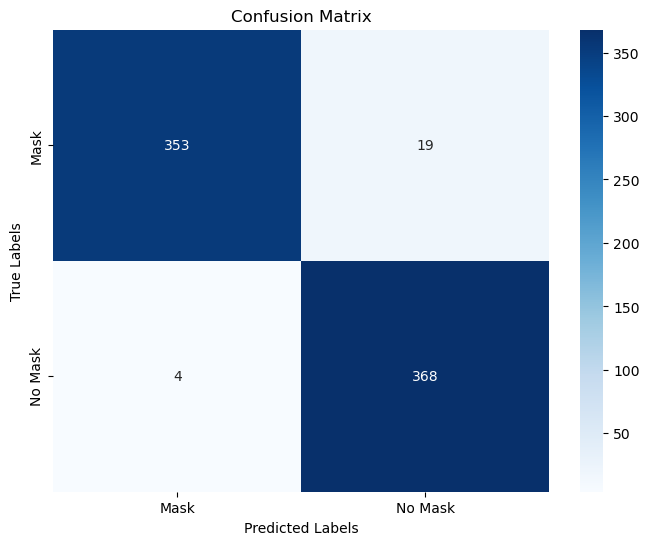

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Mask', 'No Mask'], 
            yticklabels=['Mask', 'No Mask'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()